#### WRF output cross section from <a href="https://wrf-python.readthedocs.io/en/latest/plot.html#cross-example">wrf-python examples</a> (Adapted by Lauren Getker)
This code utilizes wrf-python's CoordPair and vertcross codes to create vertical cross sections from WRF output files.
Adapted from wrf-python documentation

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from wrf import to_np, getvar, CoordPair, vertcross, latlon_coords, interplevel
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import glob
import wrf
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from metpy.plots import ctables
import metpy.calc as mpcalc
from metpy.plots import Hodograph, SkewT
from metpy.units import units
import matplotlib.gridspec as gridspec
import imageio


#Name of file to create cross section from
filename_ctrl = "/scratch/legetker/wdm_ctrl_run/wrfout_d02_1998-05-31_05:00:00"
filename_delta = "/scratch/legetker/wdm_4deg_delta/wrfout_d02_1998-05-31_05:00:00"

#Acceleration of gravity (constant) for converting to geopotential height
g = 9.8

#Latitude of first cross section point
lat1 = 43.5
#lat1 = 31.0

#Longitude of first cross section point
lon1 = -87
#lon1 = -81.0

# Latitude of second cross section point
lat2 = 43
#lat2 = 33.0

#Longitude of second cross section point
lon2 = -86
#lon2 = -79.0

data_ctrl = Dataset(filename_ctrl, "r", format="NETCDF4")
data_delta = Dataset(filename_delta, "r", format="NETCDF4")

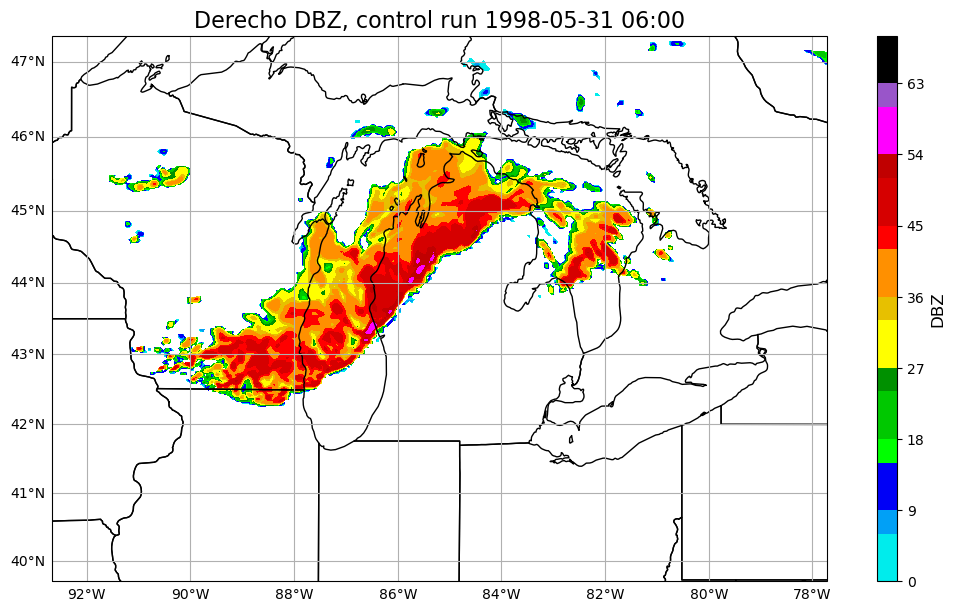

In [7]:
"""
DBZ, control
"""
lat_lon = [43.17111, -86.23685]
dbz_ctrl =getvar(data_ctrl, "dbz")
lats, lons = latlon_coords(dbz_ctrl)
mdbz_ctrl = getvar(data_ctrl, "mdbz")
p_ctrl = getvar(data_ctrl, "pressure")
dbz_850_ctrl = interplevel(dbz_ctrl, p_ctrl, 850.)
mdbz_plot_ctrl = np.where(dbz_850_ctrl > 0., dbz_850_ctrl, "NaN")
lats, lons = latlon_coords(dbz_ctrl)
time=wrf.extract_times(data_ctrl, timeidx=0, method='cat', squeeze=True, cache=None, meta=False, do_xtime=False)
timestr=(str(time))
titletime=(timestr[0:10]+' '+timestr[11:16])
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator(central_longitude = 0))
cs = ax.contourf(lons, lats, mdbz_plot_ctrl, cmap = ctables.registry.get_colortable('NWSReflectivity'), levels = np.arange(0, 70, 3), transform=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black')  #Add US states
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  #Add coastlines
#.scatter(lat_lon[1], lat_lon[0],transform=ccrs.PlateCarree(), color = '#fc03f8', edgecolors = 'black', s = 50)
#ax.scatter(lon1, lat1, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
#ax.scatter(lon1, lat1, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
#ax.scatter(lon2, lat2, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
#ax.plot([lon1,lon2], [lat1, lat2], color = 'black', transform=ccrs.PlateCarree())
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(cs, cax = cax)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels=False   # suppress top grid labels
gl.right_labels=False # suppress right grid labels
ax.set_title("Derecho DBZ, control run " + titletime, fontsize = 16)
cbar.set_label("DBZ", fontsize = 12)

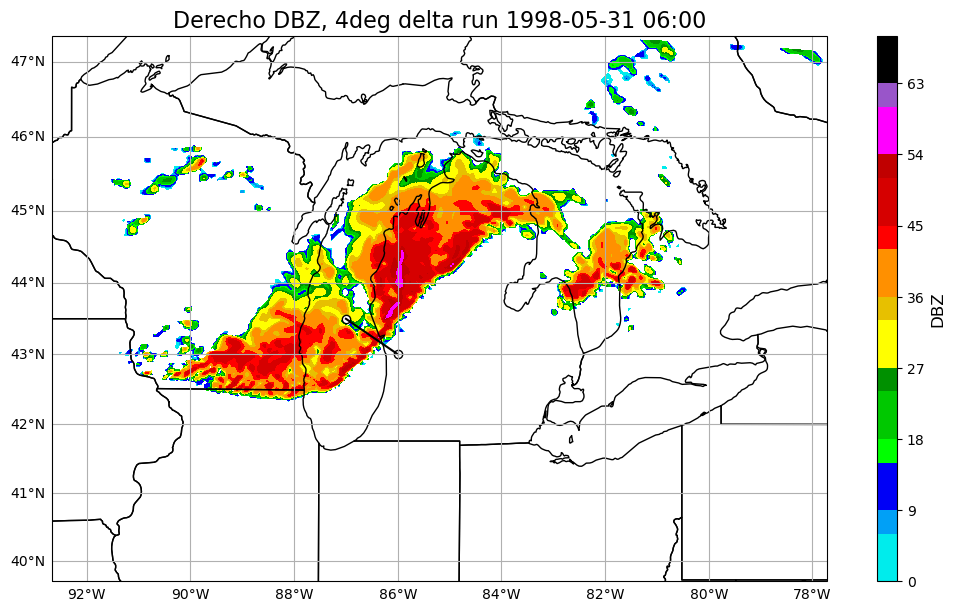

In [49]:
"""
DBZ, delta
"""
dbz_ctrl =getvar(data_delta, "dbz")
mdbz_ctrl = getvar(data_delta, "mdbz")
p_ctrl = getvar(data_delta, "pressure")
dbz_850_ctrl = interplevel(dbz_ctrl, p_ctrl, 850.)
mdbz_plot_ctrl = np.where(dbz_850_ctrl > 0., dbz_850_ctrl, "NaN")
ats, lons = latlon_coords(dbz_ctrl)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator(central_longitude = 0))
ax.add_feature(cfeature.STATES, edgecolor='black')  #Add US states
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  #Add coastlines
cs = ax.contourf(lons, lats, mdbz_plot_ctrl, cmap = ctables.registry.get_colortable('NWSReflectivity'), levels = np.arange(0, 70, 3), transform=ccrs.PlateCarree())
ax.scatter(lon1, lat1, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
ax.scatter(lon2, lat2, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
ax.plot([lon1,lon2], [lat1, lat2], color = 'black', transform=ccrs.PlateCarree())
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(cs, cax = cax)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels=False   # suppress top grid labels
gl.right_labels=False # suppress right grid labels
ax.set_title("Derecho DBZ, 4deg delta run " + titletime, fontsize = 16)
cbar.set_label("DBZ", fontsize = 12)

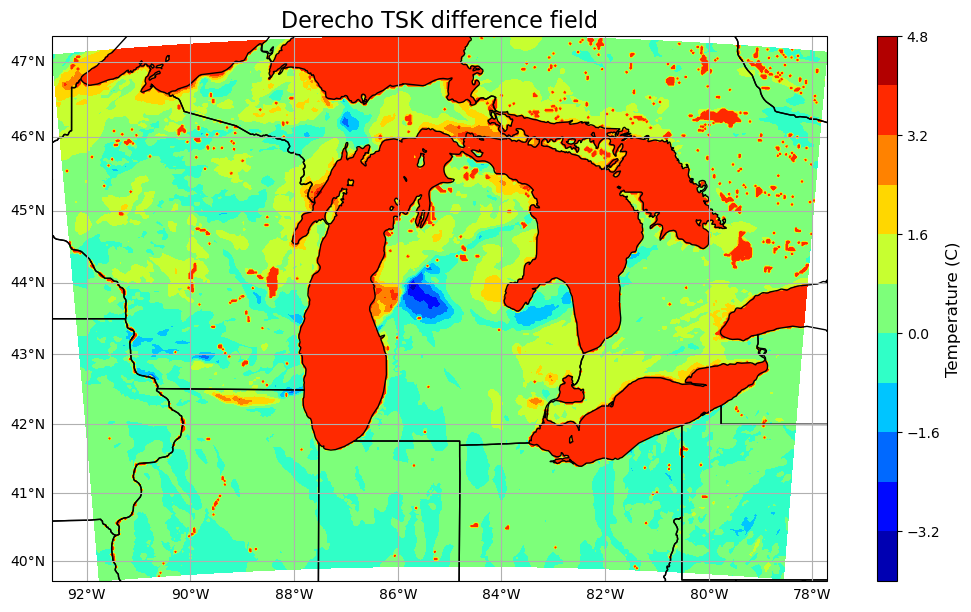

In [5]:
 """
SST DIFFERENCE FIELD
"""
sst_ctrl =getvar(data_ctrl, "TSK")
sst_delta = getvar(data_delta, "TSK")
lats, lons = latlon_coords(sst_ctrl)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator(central_longitude = 0))
ax.add_feature(cfeature.STATES, edgecolor='black')  #Add US states
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  #Add coastlines
cs = ax.contourf(lons, lats, sst_delta - sst_ctrl, cmap = "jet", levels = 10, transform=ccrs.PlateCarree())
#ax.scatter(lon1, lat1, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
#ax.scatter(lon2, lat2, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
#ax.plot([lon1,lon2], [lat1, lat2], color = 'black', transform=ccrs.PlateCarree())
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(cs, cax = cax)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels=False   # suppress top grid labels
gl.right_labels=False # suppress right grid labels
ax.set_title("Derecho TSK difference field", fontsize = 16)
cbar.set_label("Temperature (C)", fontsize = 12)

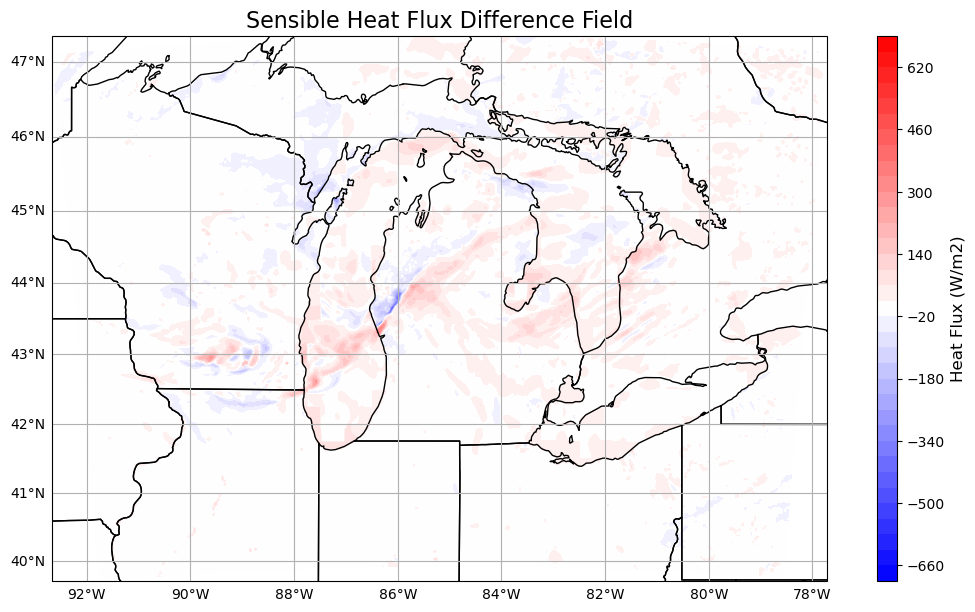

In [6]:
"""
HEAT FLUX DIFFERENCE FIELD
"""
hfx_ctrl =getvar(data_ctrl, "HFX")
hfx_delta = getvar(data_delta, "HFX")
lats, lons = latlon_coords(hfx_ctrl)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator(central_longitude = 0))
ax.add_feature(cfeature.STATES, edgecolor='black')  #Add US states
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  #Add coastlines
#ax.scatter(X_Y_Sounding_Center[1], X_Y_Sounding_Center[0], transform=ccrs.PlateCarree())
cs = ax.contourf(lons, lats, hfx_delta - hfx_ctrl, cmap = "bwr", transform=ccrs.PlateCarree(), levels = np.arange(-700, 740, 40))
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(cs, cax = cax)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels=False   # suppress top grid labels
gl.right_labels=False # suppress right grid labels
ax.set_title("Sensible Heat Flux Difference Field", fontsize = 16)
cbar.set_label("Heat Flux (W/m2)", fontsize = 12)

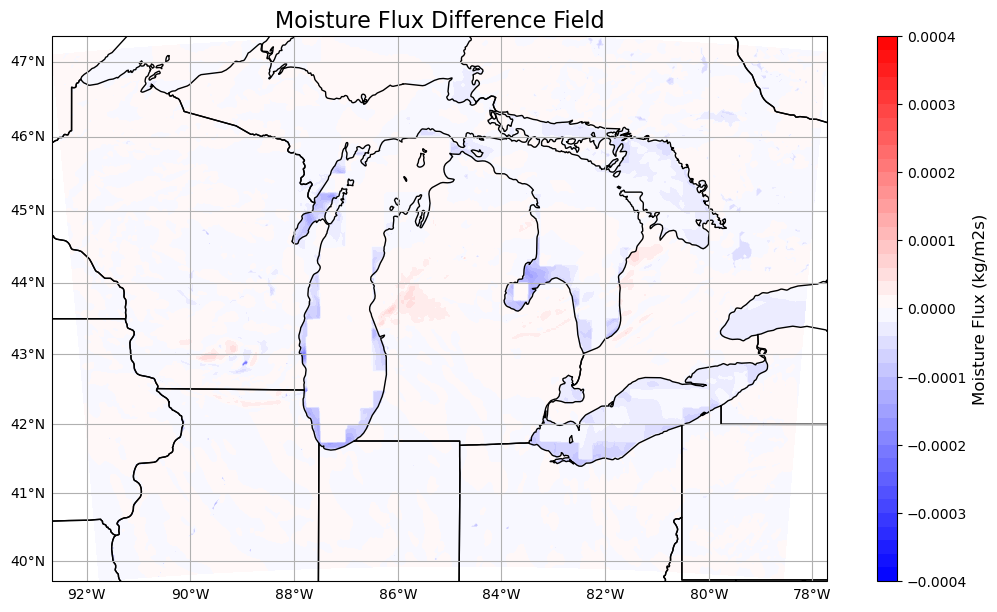

In [7]:
"""
MOISTURE FLUX DIFFERENCE FIELD
"""
hfx_ctrl =getvar(data_ctrl, "QFX")
hfx_delta = getvar(data_delta, "QFX")
lats, lons = latlon_coords(hfx_ctrl)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator(central_longitude = 0))
ax.add_feature(cfeature.STATES, edgecolor='black')  #Add US states
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  #Add coastlines
cs = ax.contourf(lons, lats, hfx_ctrl - hfx_delta, cmap = "bwr", transform=ccrs.PlateCarree(), levels = np.arange(-.0004, .00042, .00002))
#ax.scatter(lon1, lat1, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
#ax.scatter(lon2, lat2, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
#ax.plot([lon1,lon2], [lat1, lat2], color = 'black', transform=ccrs.PlateCarree())
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(cs, cax = cax)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels=False   # suppress top grid labels
gl.right_labels=False # suppress right grid labels
ax.set_title("Moisture Flux Difference Field", fontsize = 16)
cbar.set_label("Moisture Flux (kg/m2s)", fontsize = 12)

2.9987035241931297 joule / kilogram


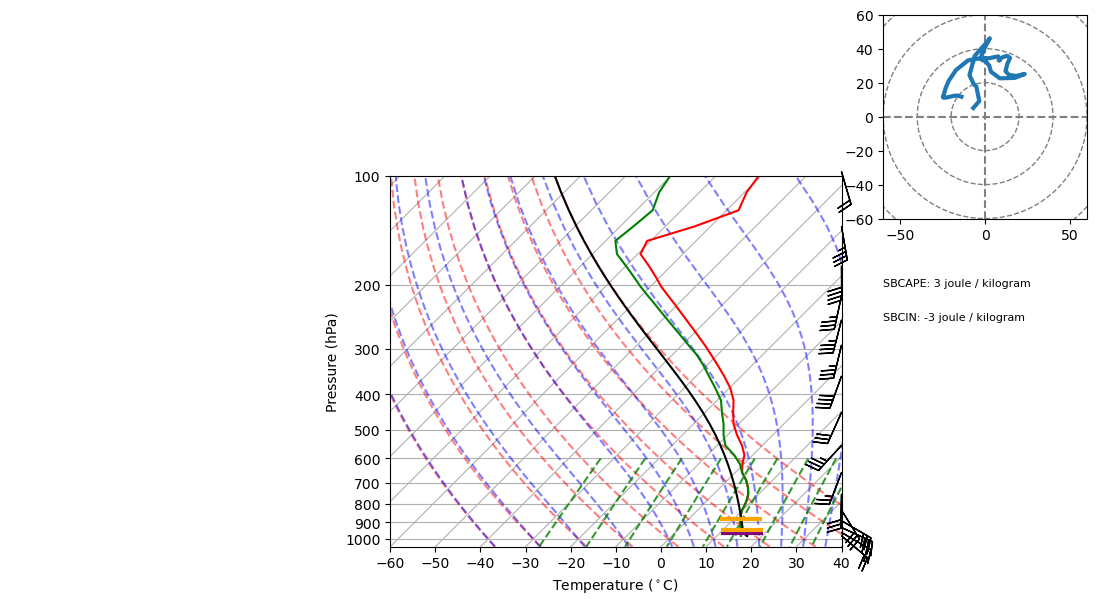

In [8]:
"""
POINT SOUNDING
"""
wrfin = data_delta
lat_lon = [43.5, -87.5]
x_y = wrf.ll_to_xy(wrfin, lat_lon[0], lat_lon[1])

p1 = wrf.getvar(wrfin,"pressure",timeidx=0)
T1 = wrf.getvar(wrfin,"tc",timeidx=0)
Td1 = wrf.getvar(wrfin,"td",timeidx=0)
u1 = wrf.getvar(wrfin,"ua",timeidx=0)
v1 = wrf.getvar(wrfin,"va",timeidx=0)

p = p1[:,x_y[0],x_y[1]] * units.hPa
T = T1[:,x_y[0],x_y[1]] * units.degC
Td = Td1[:,x_y[0],x_y[1]] * units.degC
u = v1[:,x_y[0],x_y[1]] * units('m/s')
v = u1[:,x_y[0],x_y[1]] * units('m/s')
agl = getvar(wrfin, "height_agl") * units.km
#agl = agl - agl[0]

gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(9,9))
skew = SkewT(fig, rotation=45, subplot=gs[:, :2])
ax = fig.add_subplot(gs[0, -1])
h = Hodograph(ax = ax, component_range=60.)
h.add_grid(increment=20)
boundaries = [0, 1, 3, 5, 8] * units.km
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:olive']
h.plot(u,v)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')

prof = mpcalc.parcel_profile(p, T.values[0]* units.degC, Td.values[0]* units.degC)
prof_values = prof.values - 273
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
lfc_pressure, lfc_temperature = mpcalc.lfc(p, T, Td)
el_pressure, el_temperature = mpcalc.el(p, T, Td)
cape_cin = mpcalc.cape_cin(p, T, Td, prof)
ax.text(-60, -100, "SBCAPE: " + str("{:.0f}".format(cape_cin[0])), fontsize = 8)
ax.text(-60, -120, "SBCIN: " + str("{:.0f}".format(cape_cin[1])), fontsize = 8)
print(cape_cin[0])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_xlim(-60, 40)
skew.ax.set_xlabel('Temperature ($^\circ$C)')
skew.ax.set_ylabel('Pressure (hPa)')
skew.plot_barbs(p[0::3], u[0::3], v[0::3])
skew.plot(p, prof_values, color='black')
skew.ax.plot(lcl_temperature, lcl_pressure, marker="_", color='purple', markersize=30, markeredgewidth=3)
skew.ax.plot(lfc_temperature, lfc_pressure, marker="_", color='orange', markersize=30, markeredgewidth=3)
skew.ax.plot(el_temperature, el_pressure, marker="_", color='orange', markersize=30, markeredgewidth=3)
ax.margins(x=0)

plt.savefig('SkewT_Simple.png', bbox_inches='tight')

1285.2152117621886 joule / kilogram
<class 'pint.util.Quantity'>


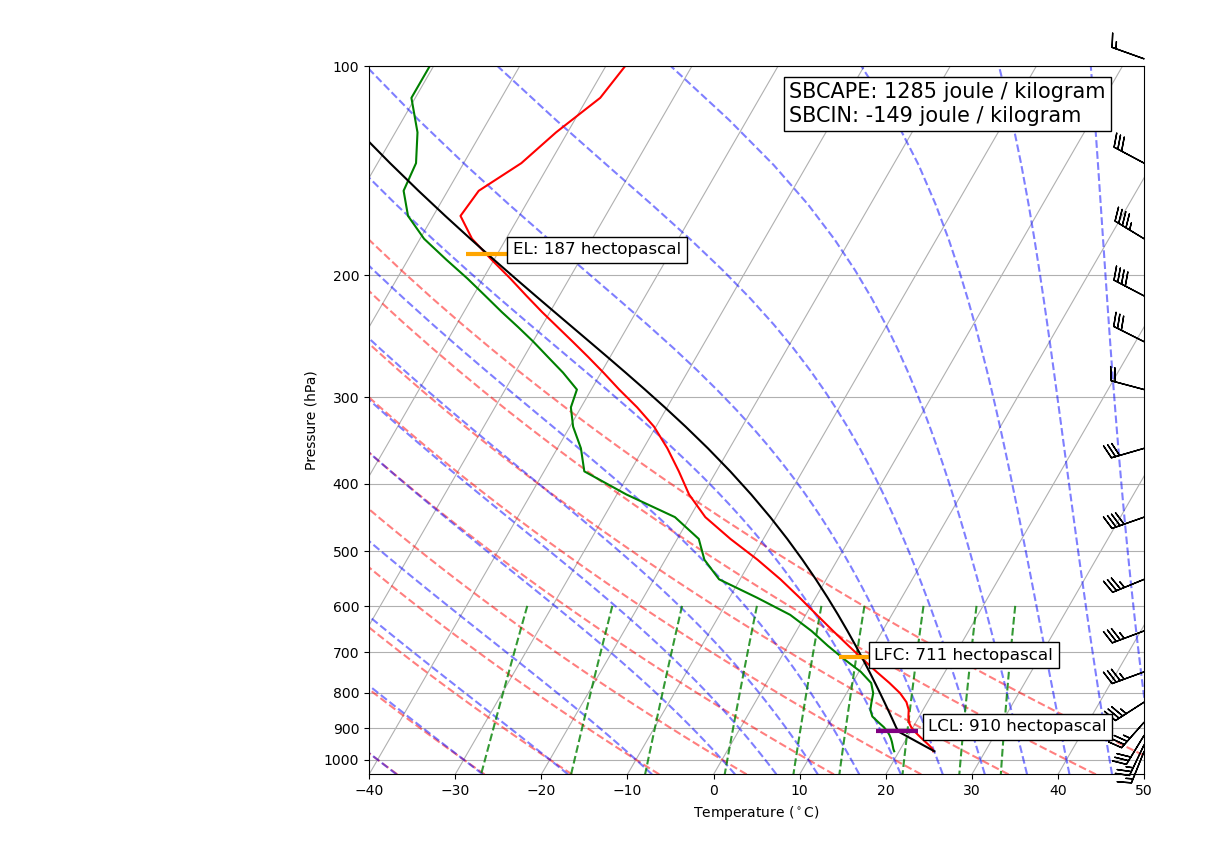

In [24]:
"""
AREA AVERAGE SOUNDING
"""
wrfin = data_delta
lat_lon_center_of_square = [43, -86] 
X_Y_Sounding_Center = wrf.ll_to_xy(wrfin, lat_lon_center_of_square[0], lat_lon_center_of_square[1])

p1 = wrf.getvar(wrfin,"pressure",timeidx=0)
T1 = wrf.getvar(wrfin,"tc",timeidx=0)
Td1 = wrf.getvar(wrfin,"td",timeidx=0)
u1 = wrf.getvar(wrfin,"ua",timeidx=0)
v1 = wrf.getvar(wrfin,"va",timeidx=0)

p_area =  p1[:,int(X_Y_Sounding_Center[1]-5):int(X_Y_Sounding_Center[1]+5),int(X_Y_Sounding_Center[0]-5):int(X_Y_Sounding_Center[0]+5)]   * units.hPa        #Average Pressure in Hpa 
T_area =  T1[:,int(X_Y_Sounding_Center[1]-5):int(X_Y_Sounding_Center[1]+5),int(X_Y_Sounding_Center[0]-5):int(X_Y_Sounding_Center[0]+5)]   * units.degC       #Average Temperature in Degrees Celsius
Td_area = Td1[:,int(X_Y_Sounding_Center[1]-5):int(X_Y_Sounding_Center[1]+5),int(X_Y_Sounding_Center[0]-5):int(X_Y_Sounding_Center[0]+5)]  * units.degC       #Average Dewpoint Temperature in Degrees Celsius
u_area =  u1[:,int(X_Y_Sounding_Center[1]-5):int(X_Y_Sounding_Center[1]+5),int(X_Y_Sounding_Center[0]-5):int(X_Y_Sounding_Center[0]+5)]   * units('m/s')     #Average Zonal Winds in m/s                  
v_area =  v1[:,int(X_Y_Sounding_Center[1]-5):int(X_Y_Sounding_Center[1]+5),int(X_Y_Sounding_Center[0]-5):int(X_Y_Sounding_Center[0]+5)]   * units('m/s')     #Average Meridional winds in m/s
agl = getvar(wrfin, "height_agl") * units.km


p_avg_we = p_area.mean(dim = 'south_north')      #Average out area sounding across the S_n array
p_avg    = p_avg_we.mean(dim = 'west_east')      #Average our area + S_N average by the W_E so we have a 1d array with pressure levels and values

#Same for Tempearture
T_avg_we = T_area.mean(dim = 'south_north')
T_avg    = T_avg_we.mean(dim = 'west_east')

#Same For Dewpopint
Td_avg_we = Td_area.mean(dim = 'south_north')
Td_avg    = Td_avg_we.mean(dim = 'west_east')

#Same for zonal wind
u_avg_we = u_area.mean(dim = 'south_north')
u_avg    = u_avg_we.mean(dim = 'west_east')

#Same for meridional wind
v_avg_we = v_area.mean(dim = 'south_north')
v_avg    = v_avg_we.mean(dim = 'west_east')


fig = plt.figure(figsize=(10,10))
skew = SkewT(fig)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p_avg, T_avg, 'r')
skew.plot(p_avg, Td_avg, 'g')

prof = mpcalc.parcel_profile(p_avg, T_avg.values[0]* units.degC, Td_avg.values[0]* units.degC)
prof_values = prof.values - 273
lcl_pressure, lcl_temperature = mpcalc.lcl(p_avg[0], T_avg[0], Td_avg[0])
lfc_pressure, lfc_temperature = mpcalc.lfc(p_avg, T_avg, Td_avg)
el_pressure, el_temperature = mpcalc.el(p_avg, T_avg, Td_avg)
cape_cin = mpcalc.cape_cin(p_avg, T_avg, Td_avg, prof)
skew.ax.text(-35,120,"SBCAPE: " + str("{:.0f}".format(cape_cin[0])) + "\nSBCIN: " + str("{:.0f}".format(cape_cin[1])), fontsize = 15,bbox=dict(facecolor='white', alpha=1))
print(cape_cin[0])

print(type(lcl_pressure))

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_xlabel('Temperature ($^\circ$C)')
skew.ax.set_ylabel('Pressure (hPa)')
skew.plot_barbs(p_avg[0::3], u_avg[0::3], v_avg[0::3])
skew.plot(p_avg, prof_values, color='black')
skew.ax.plot(lcl_temperature, lcl_pressure, marker="_", color='purple', markersize=30, markeredgewidth=3)
skew.ax.annotate("LCL: " + str("{:.0f}".format(lcl_pressure)), (lcl_temperature * 1.2, lcl_pressure), fontsize = 12,bbox=dict(facecolor='white', alpha=1))
skew.ax.plot(lfc_temperature, lfc_pressure, marker="_", color='orange', markersize=30, markeredgewidth=3)
skew.ax.annotate("LFC: "+ str("{:.0f}".format(lfc_pressure)), (lfc_temperature * 1.2, lfc_pressure * 1.01), fontsize = 12,bbox=dict(facecolor='white', alpha=1))
skew.ax.plot(el_temperature, el_pressure, marker="_", color='orange', markersize=30, markeredgewidth=3)
skew.ax.annotate("EL: "+ str("{:.0f}".format(el_pressure)), (el_temperature * .95, el_pressure), fontsize = 12,bbox=dict(facecolor='white', alpha=1))

plt.savefig('SkewT_Simple.png', bbox_inches='tight')

In [10]:
wdspd = getvar(data_ctrl, "wspd_wdir")
max_spd = np.max(wdspd[0,0,:,:])
print(max_spd)

wdspd = getvar(data_delta, "wspd_wdir")
max_spd = np.max(wdspd[0,0,:,:])
print(max_spd)

<xarray.DataArray 'wspd_wdir' ()>
array(31.821785, dtype=float32)
Coordinates:
    wspd_wdir  <U4 'wspd'
    XTIME      float32 1.8e+03
    Time       datetime64[ns] 1998-05-31T06:00:00
<xarray.DataArray 'wspd_wdir' ()>
array(31.175896, dtype=float32)
Coordinates:
    wspd_wdir  <U4 'wspd'
    XTIME      float32 1.8e+03
    Time       datetime64[ns] 1998-05-31T06:00:00


In [2]:
"""
Open the wrfout file and get geopotential height data to use as our vertical 
"""
data = data_delta
ph = getvar(data, "PH") # get geopotential perturbation 
phb = getvar(data, "PHB") # get geopotential base state 
z = ph + phb #Add base state and perturbation to get geopotential height
z = (z / 9.8) / 1000 #Convert value to km

z_notop = z[0:49]

w =  getvar(data, 'W')
#ice = getvar(data, 'QICE')
cloud = getvar(data, 'QCLOUD')
# vapor = getvar(data, 'QVAPOR')
graup = getvar(data, 'QGRAUP')
snow = getvar(data, 'QSNOW')
rain = getvar(data, 'QRAIN')
t = getvar(data, 'tc')
theta = getvar(data, 'theta')
h_diabatic = getvar(data, 'H_DIABATIC')
rthcuten = getvar(data, "RTHCUTEN")
wdspd = getvar(data, "wspd_wdir")



# Create the start point and end point for the cross section
start_point = CoordPair(lat=lat1, lon=lon1)
end_point = CoordPair(lat=lat2, lon=lon2)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
w_cross = vertcross(w, z, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

spd_cross = vertcross(wdspd, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

rain_cross = vertcross(rain, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)
t_cross = vertcross(t, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)
h_cross = vertcross(h_diabatic, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)
graup_cross = vertcross(graup, z_notop, wrfin=data, start_point=start_point,
                        end_point=end_point, latlon=True, meta=True)

snow_cross = vertcross(snow, z_notop, wrfin=data, start_point=start_point,
                        end_point=end_point, latlon=True, meta=True)
theta_cross = vertcross(theta, z_notop, wrfin=data, start_point=start_point,
                        end_point=end_point, latlon=True, meta=True)

rthcuten_cross = vertcross(rthcuten, z_notop, wrfin=data, start_point=start_point,
                      end_point=end_point, latlon=True, meta=True)
#ice_cross = vertcross(ice, z_notop, wrfin=data, start_point=start_point,
#                       end_point=end_point, latlon=True, meta=True)

cloud_cross = vertcross(cloud, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

#vapor_cross = vertcross(vapor, z_notop, wrfin=data, start_point=start_point,
#                       end_point=end_point, latlon=True, meta=True)

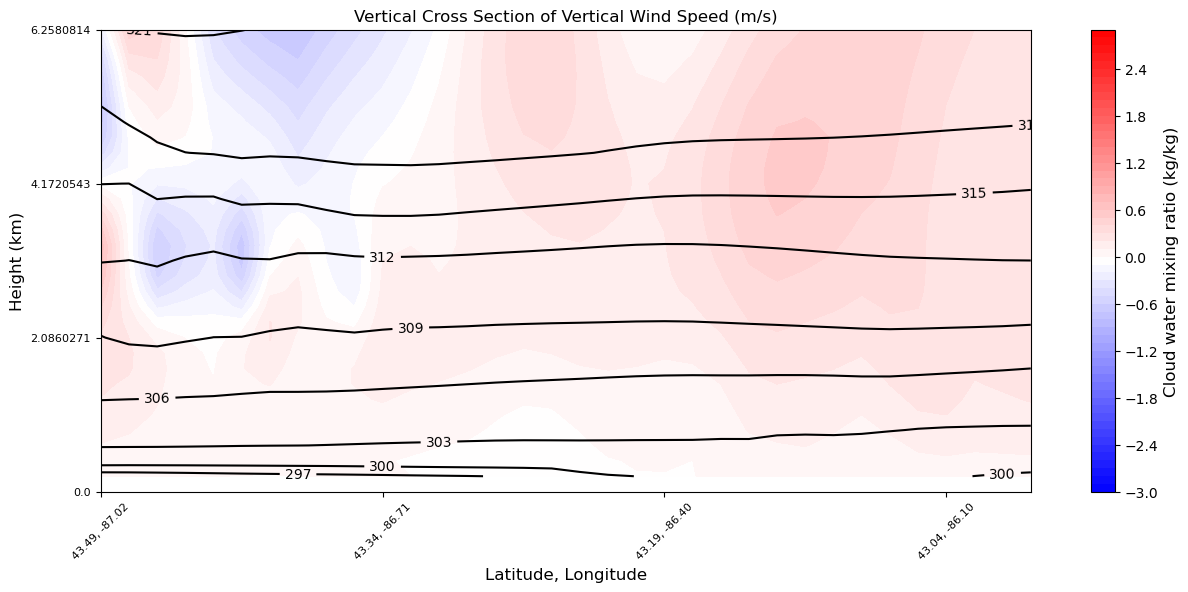

In [6]:
"""
Now, plot our cross section. You may need to edit parts of this cell to match your desired variable.
You can also get additional variables and contour them.
"""
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Contours -- make sure to modify levels here
wspd_contours = ax.contourf(to_np(w_cross), cmap="bwr", levels = np.arange(-3,3,.1))
th_cb = ax.contour(to_np(theta_cross), colors = 'black', levels = 70)
plt.clabel(th_cb)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(w_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::10])
ax.set_xticklabels(x_labels[::10], rotation=45, fontsize=8)


# Set the y-ticks to be height.
vert_vals = to_np(w_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::10])
ax.set_yticklabels(vert_vals[::10], fontsize=8)

#plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (km)", fontsize=12)
ax.set_ylim(bottom = 0, top = 30)

plt.title("Vertical Cross Section of Vertical Wind Speed (m/s)")
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(wspd_contours, cax = cax)
cbar.set_label("Cloud water mixing ratio (kg/kg)", fontsize = 12)
plt.show()

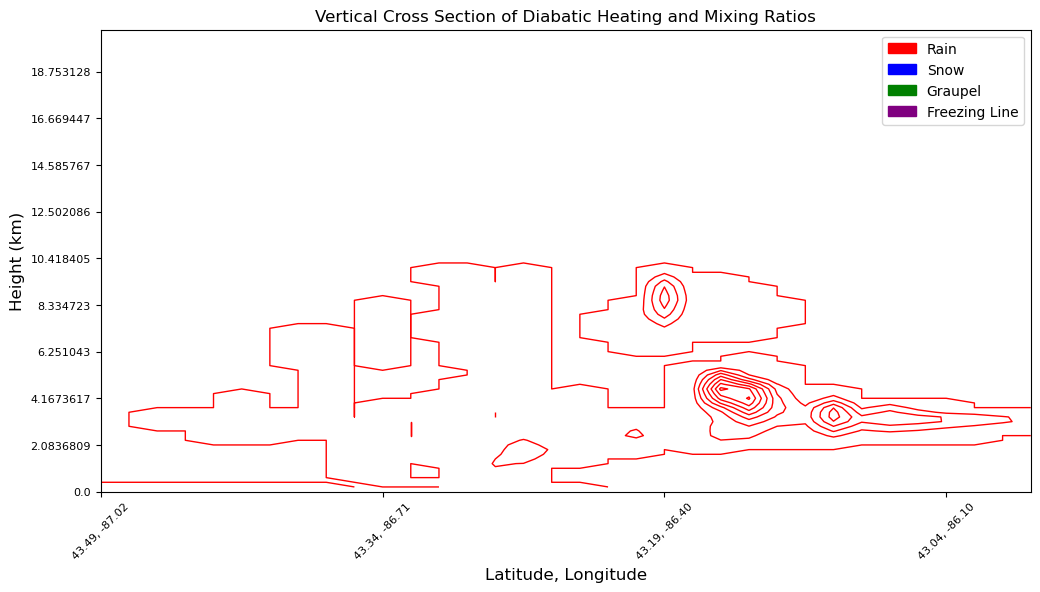

In [45]:
"""
Now, plot our cross section of hydrometeors
"""
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Contours -- make sure to modify levels here
#wspd_contours = ax.contourf(to_np(wspd_cross), cmap="bwr", levels = np.arange(-2, 2.1, .1))
#l1 = ax.contour(to_np(rain_cross), colors = ('red',), linewidths = 1)
l1 = ax.contour(to_np(cloud_cross), colors = ('red',), linewidths = 1)
#l2 = ax.contour(to_np(snow_cross), colors = ('blue',), linewidths = 1)
#l3 = ax.contour(to_np(graup_cross), colors = ('green',), linewidths = 1)
#l4 = ax.contour(to_np(t_cross), colors = ('#a503fc',), levels = np.arange(0,1, 1), linewidths = 3)
#ax.clabel(l1,fmt = "%.1E")#, levels = np.arange(0, .0008, .0002))
#ax.clabel(l2,fmt = "%.1E")#, levels = np.arange(0, .0032, .0008))
#ax.clabel(l3,fmt = "%.1E")
ax.clabel(l4)
#cs = ax.contourf(to_np(h_cross), cmap = 'bwr')
"""
#ax.contour(to_np(ice_cross), colors = ('b',), levels = 10)
ax.contour(to_np(graup_cross), colors = ('g',), levels = 10)
ax.contour(to_np(snow_cross), colors = ('b',), levels = 10)
#ax.contour(to_np(vapor_cross), colors = ('#b603fc',))
# ax.contour(to_np(cloud_cross), colors = ('#fc8403',))
#plt.colorbar(wspd_contours, ax=ax)
"""

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(w_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::10])
ax.set_xticklabels(x_labels[::10], rotation=45, fontsize=8)


# Set the y-ticks to be height.
vert_vals = to_np(w_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::10])
ax.set_yticklabels(vert_vals[::10], fontsize=8)

#plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (km)", fontsize=12)

#colorbar
#cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(cs)
cbar.set_label("Diabatic Heating (K/s)", fontsize = 12)


red_patch = mpatches.Patch(color='red', label='Rain')
blue_patch = mpatches.Patch(color='blue', label='Snow')
green_patch = mpatches.Patch(color='green', label='Graupel')
purple_patch = mpatches.Patch(color='purple', label='Freezing Line')
ax.legend(handles=[red_patch, blue_patch, green_patch, purple_patch])
plt.title("Vertical Cross Section of Diabatic Heating and Mixing Ratios")
plt.show()

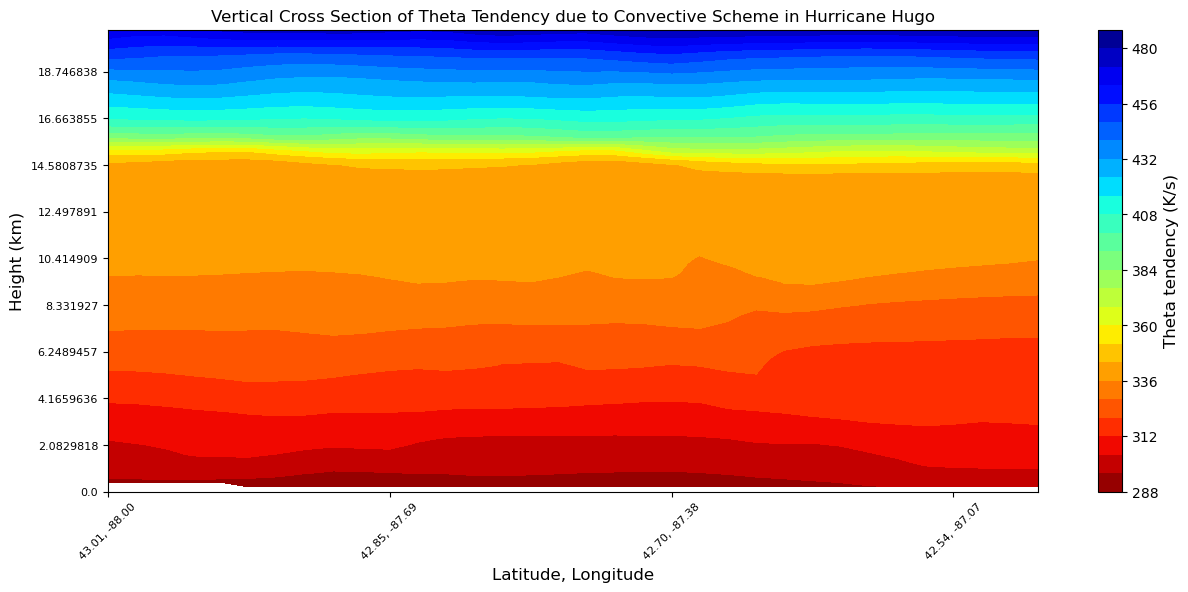

In [14]:
"""
Now, plot our cross section. You may need to edit parts of this cell to match your desired variable.
You can also get additional variables and contour them.
"""
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Contours -- make sure to modify levels here
cs = ax.contourf(to_np(theta_cross), cmap="jet_r", levels = 30)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(w_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::10])
ax.set_xticklabels(x_labels[::10], rotation=45, fontsize=8)


# Set the y-ticks to be height.
vert_vals = to_np(w_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::10])
ax.set_yticklabels(vert_vals[::10], fontsize=8)

#plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (km)", fontsize=12)

plt.title("Vertical Cross Section of Theta Tendency due to Convective Scheme in Hurricane Hugo")
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(cs, cax = cax)
cbar.set_label("Theta tendency (K/s)", fontsize = 12)
plt.show()